# CS229: PS3
## Problem 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

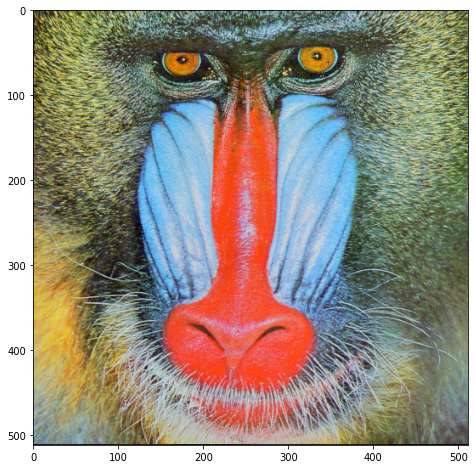

In [2]:
_large = imread('data/mandrill-large.tiff')
plt.figure(figsize=(8,8))
plt.imshow(_large);

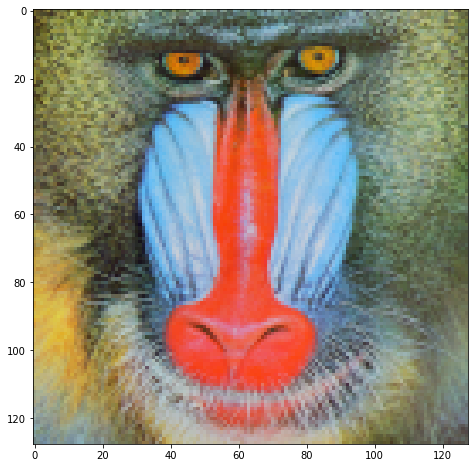

In [3]:
_small = imread('data/mandrill-small.tiff')
plt.figure(figsize=(8,8))
plt.imshow(_small);

In [15]:
def k_means(X, n_centroids=16, min_iter=30):
    _image = X.reshape(-1,3)
    centroids = _image[np.random.randint(0, _image.shape[0], n_centroids)]
    error_history = []
    error = 1
    n_iter = 0
    
    while (error > 0 or n_iter < min_iter):
        norms = np.array([np.linalg.norm(_image-centroids[k,:],2,1) for k in range(n_centroids)]).T
        assign = np.argmin(norms,1)
        means = np.array([np.mean(_image[np.where(assign == k)],0) for k in range(n_centroids)])
        error = np.linalg.norm(centroids-means,1,1).sum()
        error_history.append(error)
        centroids = means
        n_iter += 1
        
    return centroids, error_history

In [16]:
centroids, error_history = k_means(_large)

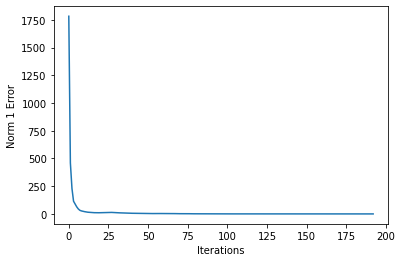

In [17]:
plt.plot(error_history);
plt.xlabel('Iterations');
plt.ylabel('Norm 1 Error');

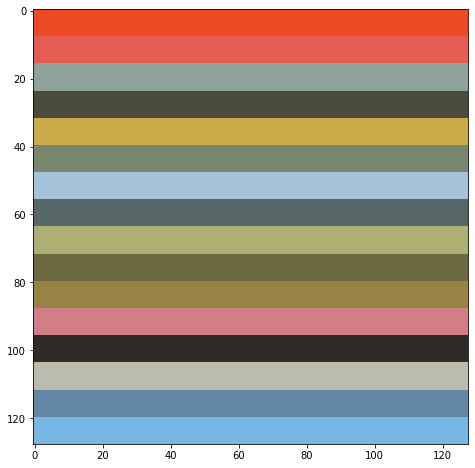

In [18]:
centroids = centroids.astype(int)
colormap = np.repeat(centroids,1024,0).reshape(128,128,3)
plt.figure(figsize=(8,8))
plt.imshow(colormap);

In [20]:
_image = _large.reshape(-1,3)

norms = np.array([np.linalg.norm(_image-centroids[k,:],2,1) for k in range(centroids.shape[0])]).T
assign = np.argmin(norms,1)
compressed_image = np.array([centroids[assign[k]] for k in range(assign.shape[0])])
compressed_image = compressed_image.reshape(512,512,3)

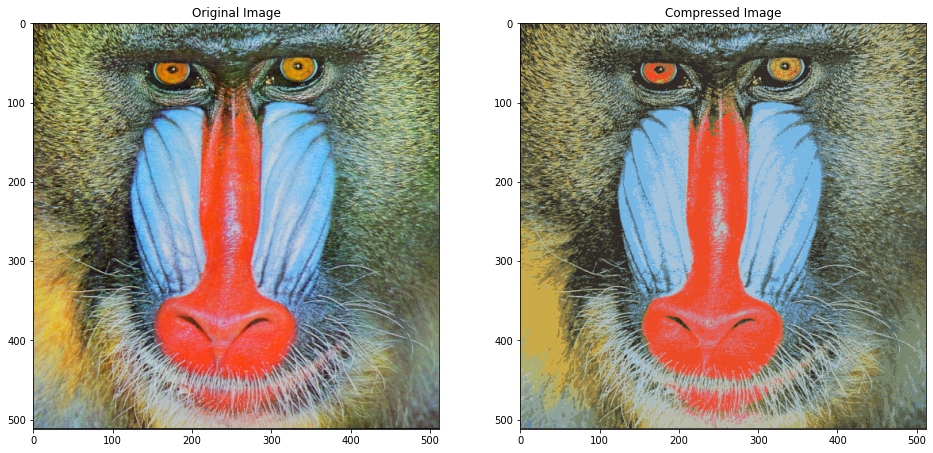

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax0, ax1 = axes.ravel()

ax0.imshow(_large)
ax0.set_title('Original');
ax1.imshow(compressed_image)
ax1.set_title('Compressed');